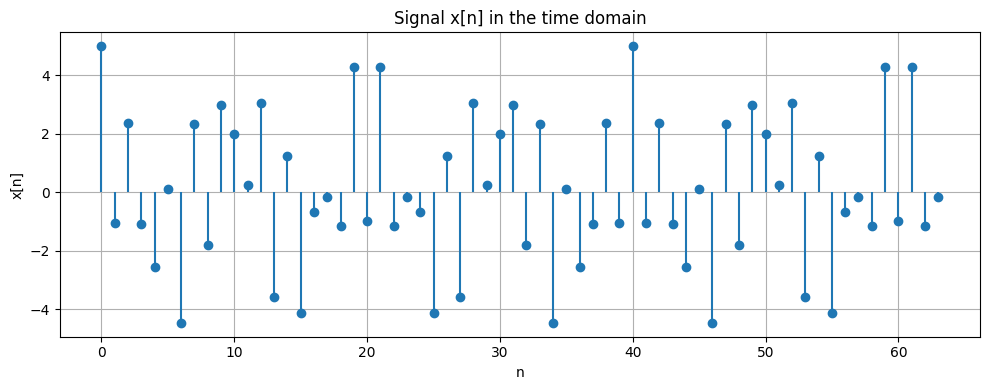

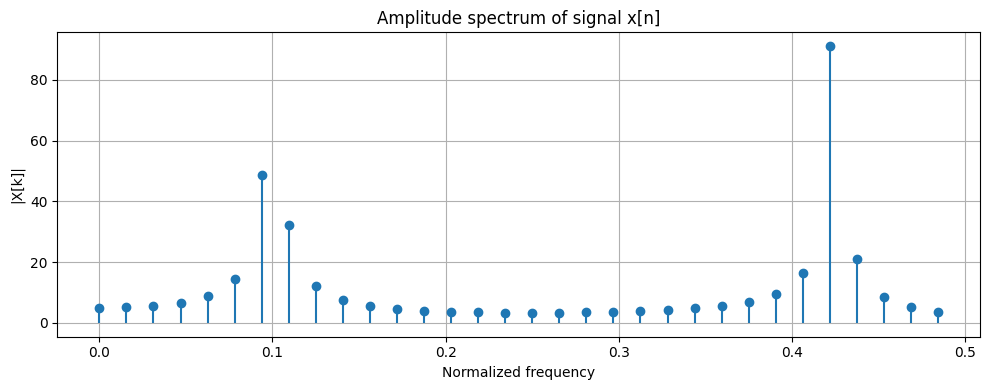

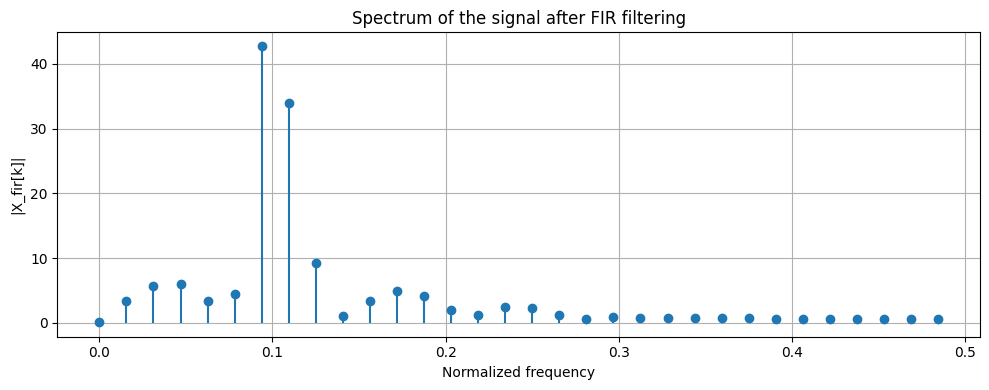

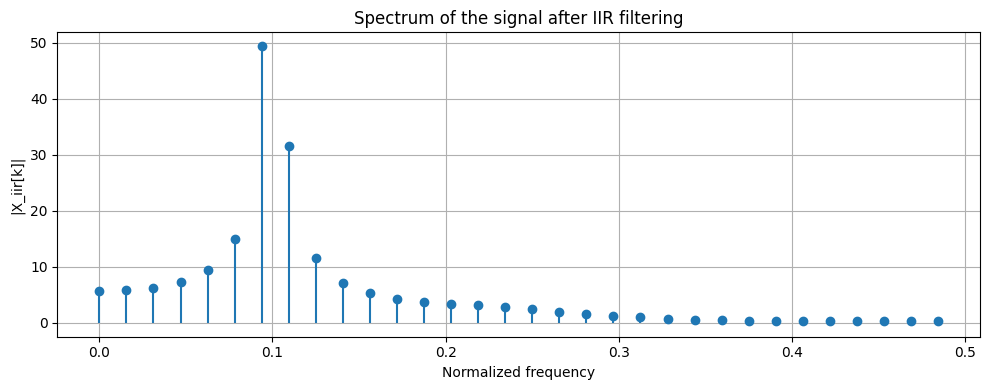

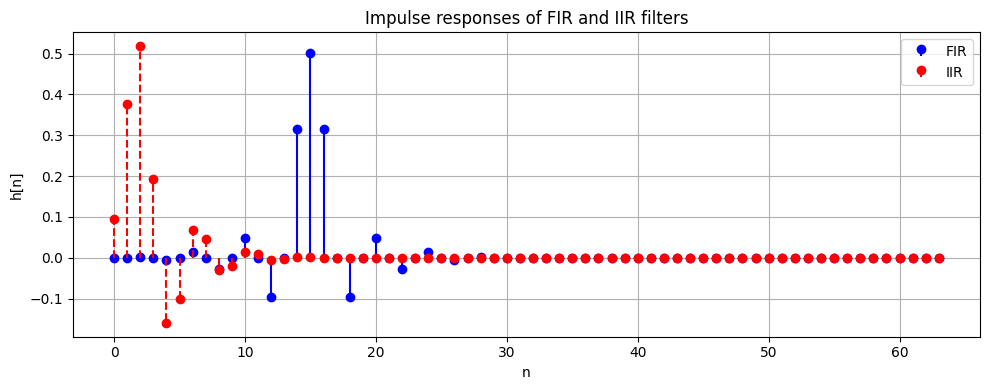

In [4]:
# -----------------------------------------------
# 1. Import required libraries
# -----------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, lfilter, butter, freqz

# -----------------------------------------------
# 2. Signal parameters (Variant 4)
# x[n] = 2*cos(0.2*pi*n) + 3*cos(0.85*pi*n)
# -----------------------------------------------
N = 64                      # number of samples
n = np.arange(N)
x = 2 * np.cos(0.2 * np.pi * n) + 3 * np.cos(0.85 * np.pi * n)

# -----------------------------------------------
# 3. Time-domain plot of the signal
# -----------------------------------------------
plt.figure(figsize=(10, 4))
plt.stem(n, x, basefmt=" ")
plt.title('Signal x[n] in the time domain')
plt.xlabel('n')
plt.ylabel('x[n]')
plt.grid(True)
plt.tight_layout()
plt.show()

# -----------------------------------------------
# 4. Fourier Transform (FFT)
# -----------------------------------------------
X = np.fft.fft(x)
freq = np.fft.fftfreq(N, d=1)  # normalized frequency axis

plt.figure(figsize=(10, 4))
plt.stem(freq[:N // 2], np.abs(X)[:N // 2], basefmt=" ")
plt.title('Amplitude spectrum of signal x[n]')
plt.xlabel('Normalized frequency')
plt.ylabel('|X[k]|')
plt.grid(True)
plt.tight_layout()
plt.show()

# -----------------------------------------------
# 5. FIR filter design (low-pass)
# -----------------------------------------------
numtaps = 31
cutoff = 0.5  # normalized cutoff frequency (0 to 1)
fir_coeffs = firwin(numtaps, cutoff)
x_fir = lfilter(fir_coeffs, 1.0, x)

# Spectrum of the signal after FIR filtering
X_fir = np.fft.fft(x_fir)

plt.figure(figsize=(10, 4))
plt.stem(freq[:N // 2], np.abs(X_fir)[:N // 2], basefmt=" ")
plt.title('Spectrum of the signal after FIR filtering')
plt.xlabel('Normalized frequency')
plt.ylabel('|X_fir[k]|')
plt.grid(True)
plt.tight_layout()
plt.show()

# -----------------------------------------------
# 6. IIR filter design (Butterworth low-pass)
# -----------------------------------------------
order = 4
b, a = butter(order, cutoff, btype='low', analog=False)
x_iir = lfilter(b, a, x)

# Spectrum of the signal after IIR filtering
X_iir = np.fft.fft(x_iir)

plt.figure(figsize=(10, 4))
plt.stem(freq[:N // 2], np.abs(X_iir)[:N // 2], basefmt=" ")
plt.title('Spectrum of the signal after IIR filtering')
plt.xlabel('Normalized frequency')
plt.ylabel('|X_iir[k]|')
plt.grid(True)
plt.tight_layout()
plt.show()

# -----------------------------------------------
# 7. Comparison of impulse responses (FIR vs IIR)
# -----------------------------------------------
impulse = np.zeros(N)
impulse[0] = 1

h_fir = lfilter(fir_coeffs, 1.0, impulse)
h_iir = lfilter(b, a, impulse)

plt.figure(figsize=(10, 4))
plt.stem(h_fir, linefmt='b-', markerfmt='bo', basefmt=' ', label='FIR')
plt.stem(h_iir, linefmt='r--', markerfmt='ro', basefmt=' ', label='IIR')
plt.title('Impulse responses of FIR and IIR filters')
plt.xlabel('n')
plt.ylabel('h[n]')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
